# Planetary Motion
~ Alfie Arrand, Abi Pearlman, Alan Watters, Rafaela Ioannou ~

Whilst we sit completely stationary writing this group project, our Earth is in fact hurtling through space at speeds almost impossible to calculate, or even comprehend. As a planet, a solar system, a galaxy, we are constantly diverging rapidly from what we know to be the 'centre of the universe'. At the equator, Earth rotates at 1000 mph. Even ignoring these two effects, we remain in orbit around the sun - it is this phenomenon we will be focusing on in this project. 
To begin with, we will explore the Earth's orbit around the sun and some of the mechanical properties tied in with various types of orbit. Then, after investigating Kepler's Second Law and the 'Three-Body Problem', we will attempt in simulating our entire solar system. 

Although we know little about any elementary particle which mediates the gravitational force, thanks to Isaac Newton we are able to compute the effect of such particle interactions between two, or multiple, bodies of mass. Given the mass of the body of interest, $m_i$, and the masses of surrounding objects, $m_j$, and their postion vectors in space, $r_i$ and $r_j$, the gravitional force, $F$, acting on body $i$ is

\begin{equation} m_i \ddot{r}_i = G \sum_{j} m_i m_j \frac{r_j - r_i}{|r_j - r_i|^3} \end{equation}

where $G = 6.67348 \times 10^{-11} m^3/kgs^2$ is the Universal Gravitional Constant.

Due to the Conservation of Angular Momentum, in practice we observe planar orbits around the sun (i.e. each planet's motion is restricted to two dimensions). So, in the case of any single planet (namely, body i), we are left with two degrees of freedom. This means that we plot the orbit with two coupled Second Order ODEs, and thus four coupled First Order ODEs:

\begin{equation} \begin{pmatrix} \dot{r}_1 \\ \dot{r}_2 \end{pmatrix} = \begin{pmatrix} v_1 \\ v_2 \end{pmatrix}\end{equation}


\begin{equation} \begin{pmatrix} \dot{v}_1 \\ \dot{v}_2 \end{pmatrix} = \frac{1}{m} \begin{pmatrix} F_1, \\ F_2 \end{pmatrix}\end{equation} 

Now, without solving these equations directly, we need an algorithm which will help plot the orbit of the planet. In order to satisfy the energy conservation feautured in these orbits, we must use what is known as a *symplectic* algorithm. So, we use the Newton-Stormer-Verlet alogrithm which, using our motion equations shown above, effectively updates the velocity over a short time period and then updates the position of the planet using the updted veolcity:

\begin{equation} v_{k+1} = v_k + \frac{F_k}{m}dt \end{equation}

\begin{equation} r_{k+1} = r_k + v_{k+1}dt .\end{equation}

Now we have the tools to plot a planar orbit. So, let us first plot the orbit of the Earth about the Sun. For simplicity in this first example, let us assume (fairly accurately) that the sun's position is unaffected by the gravitional pull of the earth. That is, the sun remains (relatively) stationary - without loss of generality, at the origin, $\begin{pmatrix} 0 \\ 0 \end{pmatrix}$. We know that the earth has near-circular orbit with an average radius of $R = 149.59787 \times 10^{9} m$. So, by the Intermediate Value Theorem, we can deduce that there must exist a point during it's orbit whereby the centre of the earth is precisely  $149.59787 \times 10^{9} m$ from the centre of the sun. And then, since we have no real reference point in time, we set the earths initial position, $r_0 = \begin{pmatrix} 149.59787 \times 10^{9} \\ 0 \end{pmatrix}$.
Furthermore, we know the masses of the earth and the sun to be $5.972 \times 10^{24}kg$ and $1.989 \times 10^{30}kg$ respectively.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

m_e = 5.972 * 10**24 #mass of the earth
m_s = 1.989 * 10**30 #mass of the sun
T = 0.4 * 10**8 #long enough time frame for at least one full orbit 
N = 10**5
dt = T/N
N = 10**5
t = np.zeros((N,))
r_e_1 = np.zeros((N,))
r_e_2 = np.zeros((N,))
v_e_1 = np.zeros((N,))
v_e_2 = np.zeros((N,))
v_e_1[0] = 0
v_e_2[0] = 29780 #assume that velocity is perpendicular to the radius when in orbit, initially
r_e_1[0] = 149.59787 * 10**9
r_e_2[0] = 0 #initial position of the earth
r_s_1 = 0
r_s_2 = 0 #position of the sun 
G = 6.67348 * 10**(-11)
def gforce2(m_1,m_2,r_1_1,r_1_2,r_2_1,r_2_2): #gravitional force between two masses
    f1 = G * m_1 * m_2 * (r_2_1 - r_1_1)/abs(((r_2_1 - r_1_1)**2 + (r_2_2 - r_1_2)**2)**1.5)
    f2 = G * m_1 * m_2 * (r_2_2 - r_1_2)/abs(((r_2_1 - r_1_1)**2 + (r_2_2 - r_1_2)**2)**1.5)
    return f1*dt, f2*dt
for k in range(0,N-1):
    F_f1, F_f2 = gforce2(m_e,m_s,r_e_1[k],r_e_2[k],r_s_1,r_s_2)
    t[k + 1] = t[k] + dt
    v_e_1[k + 1] = v_e_1[k] + F_f1/m_e
    v_e_2[k + 1] = v_e_2[k] + F_f2/m_e
    r_e_1[k + 1] = r_e_1[k] + v_e_1[k + 1]*dt
    r_e_2[k + 1] = r_e_2[k] + v_e_2[k + 1]*dt

x = []
y = []
for m in range(630):
    j = (m / 315) - 1
    x.append(149.59787 * 10**9 * np.cos(j))
    y.append(149.59787 * 10**9 * np.sin(j))
    
plt.figure(figsize=(8,8))
plt.plot(r_e_1,r_e_2, label='earth')
plt.plot(r_s_1,r_s_2, '.', label='sun')
plt.plot(x,y, label='circle')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

<Figure size 800x800 with 1 Axes>

To explain what we have done here, here is a brief description. The first 20 lines of code are simply importing the necessary libraries and laying out the initial conditions in arrays in order to implement the Verlet algorithm recursively.  Next we define a function `gforce2` which, for any two bodies of mass, implements Newton's Law of Gravitation and returns the gravitational force, F, multiplied by our time step, dt, in each dimension. Using this, we now create a simple 'for loop' which implements the Verlet algorithm and produces four complete arrays of the displacement and velocity in each dimension of the planet we're modelling. Note, we use 100,000 iterations to build the most accurate model whilst still producing the plot sufficiently quickly. Finally, we plotted the position vectors for planet after each iteration and we see the orbit shown in blue. For reference we have also included the plot of a circle of radius $R = 149.59787 \times 10^{9} m$.


Note that here we use an initial velocity of $29.78 km/s$, as is the observed average orbit velocity, and we have a (very nearly) circular orbit. In aid of the remainder of this project, we now create a function which takes all the relevant details of any planet orbiting the sun - average orbit radius, planet mass, orbit period and average orbit velocity - and produces the orbit for that planet. Such a function will allow us to observe changes when we alter any of these conditions.

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


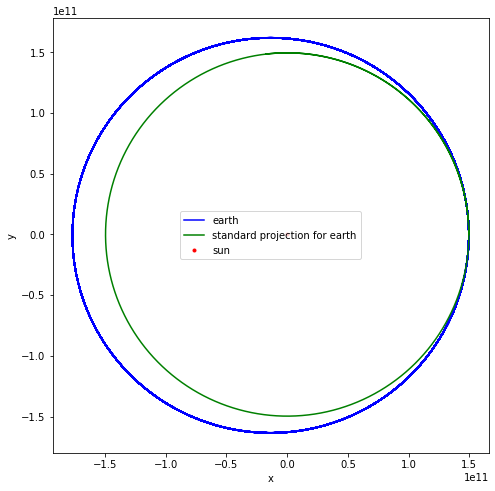

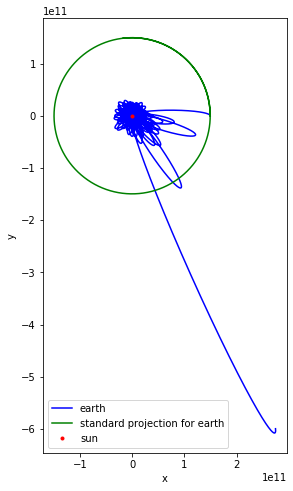

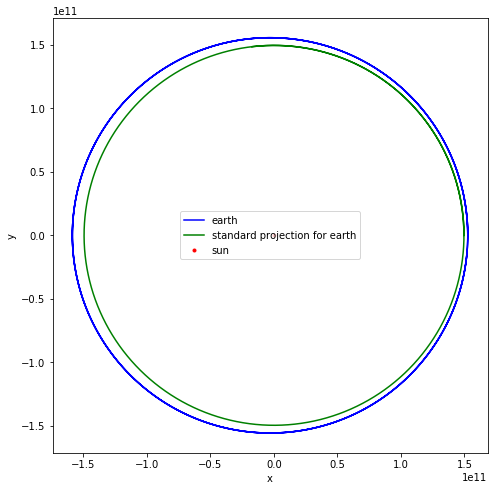

(array([0.0000e+00, 1.0000e+03, 2.0000e+03, ..., 9.9997e+07, 9.9998e+07,
        9.9999e+07]),
 array([1.52597870e+11, 1.52597864e+11, 1.52597853e+11, ...,
        1.51987235e+11, 1.51989868e+11, 1.51992495e+11]),
 array([ 0.00000000e+00,  2.97800000e+07,  5.95599989e+07, ...,
        -1.37856925e+10, -1.37560316e+10, -1.37263703e+10]))

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def heliocentricorbit(R,m,v0,T):
    m_s = 1.989 * 10**30
    G = 6.67348 * 10**(-11)
    def gforcesun(m,r_1,r_2): 
        f1 = G * m * m_s * (-r_1)/abs((r_1**2 + r_2**2)**1.5)
        f2 = G * m * m_s * (-r_2)/abs((r_1**2 + r_2**2)**1.5)
        return f1*dt, f2*dt
    N = 10**5
    dt = T/N
    t = np.zeros((N,))
    r_1 = np.zeros((N,))
    r_2 = np.zeros((N,))
    v_1 = np.zeros((N,))
    v_2 = np.zeros((N,))
    v_1[0] = 0
    v_2[0] = v0
    r_1[0] = R
    r_2[0] = 0
    for k in range(0,N-1):
        F_f1, F_f2 = gforcesun(m,r_1[k],r_2[k])
        t[k + 1] = t[k] + dt
        v_1[k + 1] = v_1[k] + F_f1/m_e
        v_2[k + 1] = v_2[k] + F_f2/m_e
        r_1[k + 1] = r_1[k] + v_1[k + 1]*dt
        r_2[k + 1] = r_2[k] + v_2[k + 1]*dt
    
    plt.figure(figsize=(8,8))
    plt.gca().set_aspect('equal', adjustable='box')
    plt.plot(r_1,r_2,'b', label='earth')
    plt.plot(r_e_1,r_e_2,'g', label='standard projection for earth')
    plt.plot(0,0,'.r', label='sun')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()
    return t, r_1, r_2

heliocentricorbit(149.59787 * 10**9,5.972 * 10**24,31000,5 * 10**9)
heliocentricorbit(149.59787 * 10**9,5.972 * 10**24,3000,1.55 * 10**8)
heliocentricorbit(152.59787 * 10**9,5.972 * 10**24,29780,1 * 10**8)

We want to verify that the orbit plotted above is in fact a  closed orbit. We can show this by verifying that $r(T) = r(0)$ for $T$ the period of orbit, which for earth is approximately $31.5$ million seconds, and since each iteration in our code is $1000$ seconds, we search around iteration $31500$ to see if the Earth returns to its initial position. We define this as a function of initial velocity for later use.

In [4]:
def closed_orbit(v0):
    R =149.59787 * 10**9
    m = 5.972 * 10**24
    T = 0.4 * 10**8
    m_s = 1.989 * 10**30
    G = 6.67348 * 10**(-11)
    def gforcesun(m,r_1,r_2): 
        f1 = G * m * m_s * (-r_1)/abs((r_1**2 + r_2**2)**1.5)
        f2 = G * m * m_s * (-r_2)/abs((r_1**2 + r_2**2)**1.5)
        return f1*dt, f2*dt
    N = 10**5
    dt = T/N
    t = np.zeros((N,))
    r_1 = np.zeros((N,))
    r_2 = np.zeros((N,))
    v_1 = np.zeros((N,))
    v_2 = np.zeros((N,))
    v_1[0] = 0
    v_2[0] = v0
    r_1[0] = R
    r_2[0] = 0
    for k in range(0,N-1):
        F_f1, F_f2 = gforcesun(m,r_1[k],r_2[k])
        t[k + 1] = t[k] + dt
        v_1[k + 1] = v_1[k] + F_f1/m_e
        v_2[k + 1] = v_2[k] + F_f2/m_e
        r_1[k + 1] = r_1[k] + v_1[k + 1]*dt
        r_2[k + 1] = r_2[k] + v_2[k + 1]*dt
    
    a = r_1[int((0.31532*10**5))] - 149.59787 * 10**9
    b = r_2[int((0.31532*10**5))] -0
    if a < 10**7 and b < 10**11:
        return "the orbit is closed"
    else:
        return "the orbit is not closed"
        
closed_orbit(29780)

'the orbit is closed'

Next we want to verify that the total energy of the system remains constant, i.e $E = KE - GPE$ is constant. Through the calculations in the cell below we see that the energy is pretty constant at around $7.947\times10^{33}kgm^3s^{-2}$.

In [5]:
for t in [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]:
    v = v_e_1[t]**2 + v_e_2[t]**2 #the absolute value of the speed at time t, squared
    r = (r_e_1[t]**2 + r_e_2[t]**2)**0.5 #the distance of the Earth from the Sun at time t
    KE = 0.5 * m_e * v
    GPE  = (-G*m_e * m_s)/r
    E = KE - GPE
    print(E)

7.946978221240604e+33
7.946981746037024e+33
7.946985599237707e+33
7.946989780599302e+33
7.946994289857728e+33
7.946999126728191e+33
7.947004290905218e+33
7.947009782062646e+33
7.94701559985366e+33
7.947021743910821e+33
7.947028213846087e+33


Now we would like to analytically derive that a value of $29.8kms^{-1}$ for the initial velocity is the only value compatible with a near circular orbit. We have two equations for the force on the Earth: $F = \frac{mv^2}{r}$ and $F = \frac{GMm}{r^2}$, where $M$ is the mass of the sun, $m$ is the mass of the Earth and $r$ is the distance between the Sun and the Earth, which is equal to $1.5\times10^{11}m$. We can set these equations to be equal to eachother, and rearranging we obtain $v = \sqrt{\frac{GM}{r}}$.

In [6]:
r = 1.5*10**11
v = ((G*m_s)/ r)**0.5 #this gives us v in ms-1 so we divide by 1000 to find v in kms-1
print(v/1000)

29.74732673703639


We vary the initial velocity's magnitude and plot the resulting trajectories, with the positions of the aphelion and perihelion marked. The aphelion is the point on the orbit furthest from the Sun, and the perihelion is the point on the orbit closest to the Sun. 

We check if each orbit is closed to determine whether the orbit is elliptical or hyperbolic.

We also calculate the eccentricity of the elliptical trajectories, which is the ratio of major to minor axes, using the fact that the aphelion and perihelion have respective x-coordinate $a(1+e), -a(1-e)$ where $a$ is the length of the semi-major axis and $e$ is the eccentricity. So we can find the eccentricity by finding the sum of the x-coordinates and dividing by the difference.

elliptical trajectory
0.9718164965355598


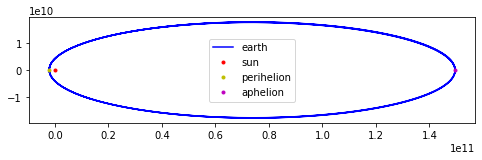

elliptical trajectory
0.887295878684613


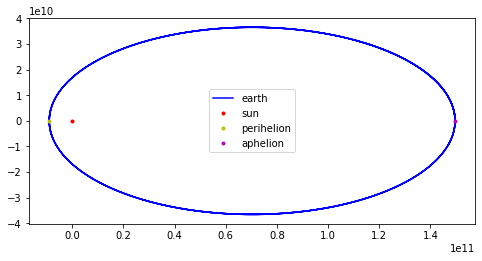

elliptical trajectory
0.746416565127023


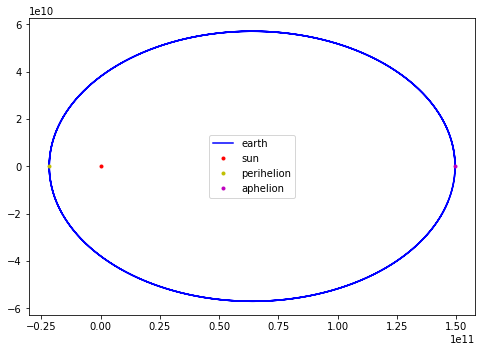

elliptical trajectory
0.5491850991966618


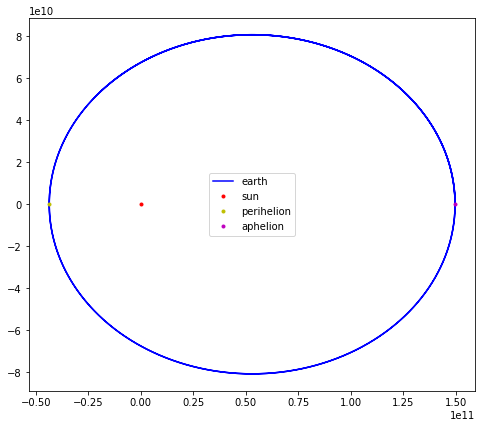

elliptical trajectory
0.29560172568863496


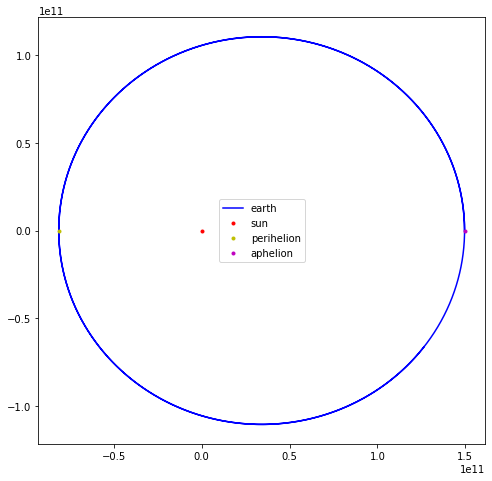

elliptical trajectory
0.014333510987465098


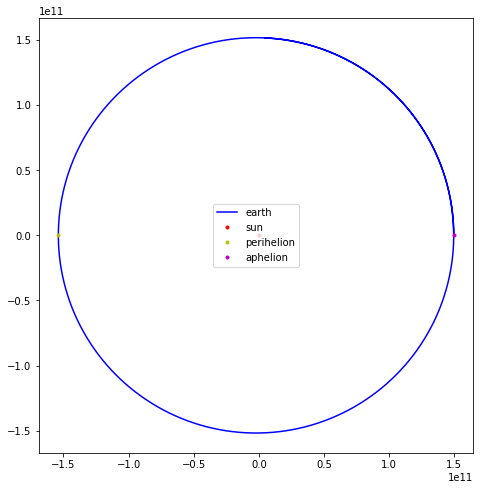

hyperbolic trajectory


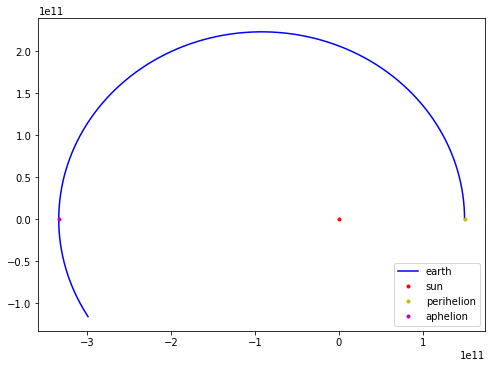

hyperbolic trajectory


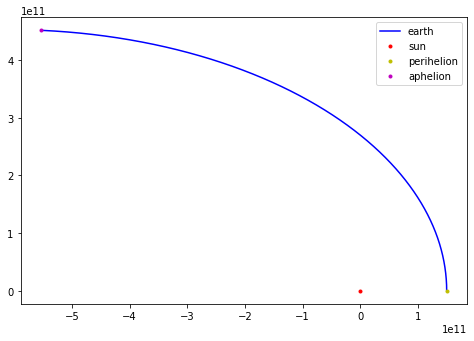

hyperbolic trajectory


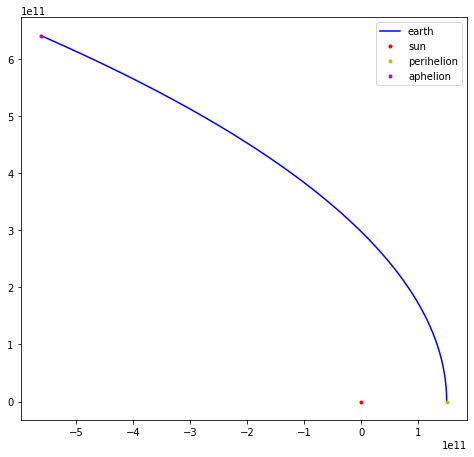

In [7]:
def varied_v0_orbit(v0):
    m = m_e
    T = 0.4 * 10**8
    m_s = 1.989 * 10**30
    G = 6.67348 * 10**(-11)
    def gforcesun(m,r_1,r_2): 
        f1 = G * m * m_s * (-r_1)/abs((r_1**2 + r_2**2)**1.5)
        f2 = G * m * m_s * (-r_2)/abs((r_1**2 + r_2**2)**1.5)
        return f1*dt, f2*dt
    N = 10**5
    dt = T/N
    t = np.zeros((N,))
    r_1 = [0]*N
    r_2 = [0]*N
    v_1 = np.zeros((N,))
    v_2 = np.zeros((N,))
    v_1[0] = 0
    v_2[0] = v0
    r_1[0] = r_e_1[0]
    r_2[0] = 0
    L = []
    for k in range(0,N-1):
        F_f1, F_f2 = gforcesun(m,r_1[k],r_2[k])
        t[k + 1] = t[k] + dt
        v_1[k + 1] = v_1[k] + F_f1/m_e
        v_2[k + 1] = v_2[k] + F_f2/m_e
        r_1[k + 1] = r_1[k] + v_1[k + 1]*dt
        r_2[k + 1] = r_2[k] + v_2[k + 1]*dt    
      
    if closed_orbit(v0) == "the orbit is closed":
        elliptical = True
        print("elliptical trajectory")
        p = r_1.index(min(r_1)) #finds the point nearest the sun
        peri = (r_1[p], r_2[p])
        a = r_1.index(max(r_1))#finds the point furthest from the sun
        aph = (r_1[a], r_2[a])
    else:
        elliptical = False
        print("hyperbolic trajectory")
        p = r_1.index(max(r_1)) #finds the point nearest the sun
        peri = (r_1[p], r_2[p])
        a = r_1.index(min(r_1))#finds the point furthest from the sun
        aph = (r_1[a], r_2[a])
    
    ma = max(r_1) - min(r_1) #the major axis of the ellipse
    e =  np.abs((max(r_1) + min(r_1))/ma) #calculates the eccentricity
    if elliptical == True: #we only want the eccentricity of the elliptical orbits
        print(e)  
    
    plt.figure(figsize=(8,8))
    plt.gca().set_aspect('equal', adjustable='box')
    plt.plot(r_1,r_2,'b', label='earth')
    plt.plot(0,0,'.r', label='sun')
    plt.plot(peri[0], peri[1],'.y', label='perihelion')
    plt.plot(aph[0], aph[1], '.m', label='aphelion')
    plt.legend()
    plt.show()
    return t, r_1, r_2

for v0 in [5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 42000]: #we stop before the escape velocity calculated below
    varied_v0_orbit(v0)


The escape velocity is the first velocity at which the orbit is no longer elliptical. We find this using the closed orbit function defined above.

To find the theoretical escape velocity of the Earth from its orbit around the sun, we set the total energy of the system at the time of its escape to $0$, as at this time $R$ goes to $\infty$ so the potential energy goes to $0$, and the velocity is $0$, so its kinetic energy is also $0$. So the total energy at the initial time must also be $0$. Hence $\frac{-GMm}{R} + \frac{1}{2}mv^2 = 0$. We rearrange to find the formula for the escape velocity: $v = \sqrt{\frac{2GM}{R}}$.

We see that the initial total energy of the system is closer to $0$ for the theoretical escape velocity than the calculated escape velocity.

In [9]:
print(closed_orbit(30000))
print(closed_orbit(30100))
print(closed_orbit(30200))
print(closed_orbit(30150)) #finding bounds for the escape velocity to make the seach quicker
for v in range(30150, 30200):
    if closed_orbit(v) == "the orbit is not closed":
        h =v 
        print(h/1000) #The escape velocity of the Earth in our model in kms-1
        break
        
KE = 0.5 * m_e * h**2 #the initial kinetic energy of the system
PE = (-G*m_s*m_e)/r_e_1[0] # the initial potential energy of the system
print(KE+PE) #the total energy of the system, this should be close to 0

v = ((2*G*m_s)/r)**0.5
print(v/1000) #The theoretical escape velocity in kms-1

KE = 0.5 * m_e * v**2 #the initial kinetic energy of the system
print(KE+PE) #the total energy of the system, this should be close to 0

the orbit is closed
the orbit is closed
the orbit is not closed
the orbit is closed
30.168
-2.5812657419766054e+33
42.06907291586065
-1.4205507384604892e+31



Next up, we will verify Kepler's second law; for the above elliptical trajectories, we will test that "A line joining a planet and the Sun sweeps out equal areas during equal intervals of time". 

The rate of change of the area is given by the equation $ \frac{dA}{dt} = \frac{r^2}{2} \frac{d\theta}{dt}$

where $r$ is the position of the planet, and $\frac{d\theta}{dt}$ the rate of change of the angle covered by the planet's orbit.

Therefore, in order to calculate the area, we must first calculate the angle covered in a given time interval. Using the position of the sun, and the positions of the planet at the start and at the end of the time interval, we will create a triangle, which will allow us to calculate the rate of change of the angle $\theta$, and, finally, the rate of change of the area covered, which should give us a constant number.

elliptical trajectory
0.9718164965355598


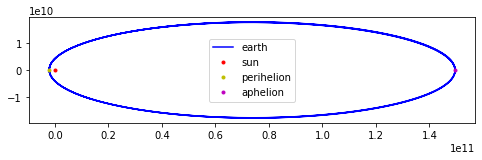

[0.00000000e+00 4.98659537e+11 4.98659524e+11 4.98658886e+11
 4.98659481e+11 4.98659450e+11 4.98659413e+11 4.98659990e+11
 4.98659941e+11 4.98659885e+11 4.98659824e+11 4.98659756e+11
 4.98659682e+11 4.98659602e+11 4.98659206e+11 4.98659114e+11
 4.98659635e+11 4.98659530e+11 4.98659419e+11 4.98659302e+11
 4.98659179e+11 4.98659360e+11 4.98660154e+11 4.98659083e+11
 4.98658935e+11 4.98658472e+11 4.98659551e+11 4.98659385e+11
 4.98659213e+11 4.98659654e+11 4.98659469e+11 4.98659588e+11
 4.98660011e+11 4.98659808e+11 4.98659289e+11 4.98659074e+11
 4.98658852e+11 4.98659244e+11 4.98659320e+11 4.98659080e+11
 4.98659454e+11 4.98659511e+11 4.98659253e+11 4.98658989e+11
 4.98659028e+11 4.98659370e+11 4.98659087e+11 4.98659728e+11
 4.98660052e+11 4.98659751e+11 4.98659133e+11 4.98659439e+11
 4.98659739e+11 4.98659103e+11 4.98659390e+11 4.98658742e+11
 4.98659327e+11 4.98658977e+11 4.98659240e+11 4.98659806e+11
 4.98659437e+11 4.98659991e+11 4.98659610e+11 4.98659532e+11
 4.98660377e+11 4.986596

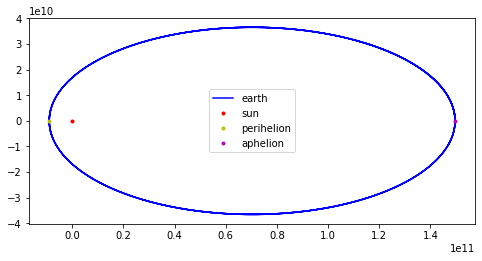

[0.00000000e+00 9.97319229e+11 9.97318896e+11 9.97319481e+11
 9.97319126e+11 9.97319069e+11 9.97319156e+11 9.97319077e+11
 9.97319296e+11 9.97318884e+11 9.97319081e+11 9.97319112e+11
 9.97318976e+11 9.97318984e+11 9.97319136e+11 9.97318967e+11
 9.97318942e+11 9.97318905e+11 9.97319322e+11 9.97318953e+11
 9.97319037e+11 9.97318956e+11 9.97318708e+11 9.97318604e+11
 9.97319108e+11 9.97318672e+11 9.97318689e+11 9.97318540e+11
 9.97318999e+11 9.97318983e+11 9.97319110e+11 9.97318916e+11
 9.97319330e+11 9.97319114e+11 9.97318886e+11 9.97318957e+11
 9.97319017e+11 9.97318756e+11 9.97318948e+11 9.97318974e+11
 9.97318989e+11 9.97318992e+11 9.97318985e+11 9.97318966e+11
 9.97319091e+11 9.97319049e+11 9.97318997e+11 9.97319088e+11
 9.97319013e+11 9.97318772e+11 9.97318519e+11 9.97318411e+11
 9.97318910e+11 9.97318934e+11 9.97319101e+11 9.97318793e+11
 9.97318783e+11 9.97319226e+11 9.97319039e+11 9.97318841e+11
 9.97318476e+11 9.97318874e+11 9.97319107e+11 9.97318709e+11
 9.97319073e+11 9.973189

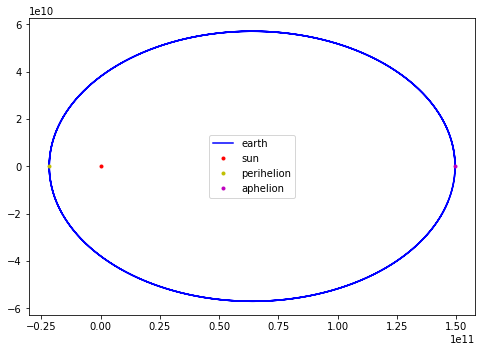

[0.00000000e+00 1.49597882e+12 1.49597879e+12 1.49597874e+12
 1.49597868e+12 1.49597871e+12 1.49597842e+12 1.49597873e+12
 1.49597872e+12 1.49597849e+12 1.49597876e+12 1.49597860e+12
 1.49597873e+12 1.49597865e+12 1.49597886e+12 1.49597875e+12
 1.49597842e+12 1.49597849e+12 1.49597854e+12 1.49597858e+12
 1.49597839e+12 1.49597861e+12 1.49597861e+12 1.49597848e+12
 1.49597845e+12 1.49597851e+12 1.49597845e+12 1.49597858e+12
 1.49597839e+12 1.49597859e+12 1.49597837e+12 1.49597845e+12
 1.49597840e+12 1.49597855e+12 1.49597848e+12 1.49597850e+12
 1.49597840e+12 1.49597839e+12 1.49597826e+12 1.49597833e+12
 1.49597838e+12 1.49597862e+12 1.49597844e+12 1.49597855e+12
 1.49597833e+12 1.49597821e+12 1.49597838e+12 1.49597844e+12
 1.49597827e+12 1.49597830e+12 1.49597820e+12 1.49597820e+12
 1.49597839e+12 1.49597836e+12 1.49597832e+12 1.49597805e+12
 1.49597819e+12 1.49597800e+12 1.49597831e+12 1.49597840e+12
 1.49597827e+12 1.49597823e+12 1.49597848e+12 1.49597821e+12
 1.49597802e+12 1.495978

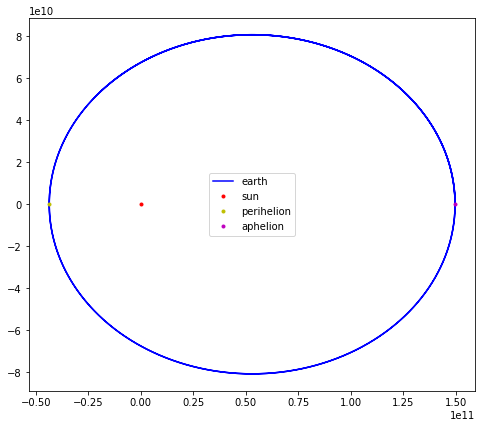

[0.00000000e+00 1.99463846e+12 1.99463820e+12 1.99463830e+12
 1.99463840e+12 1.99463817e+12 1.99463816e+12 1.99463805e+12
 1.99463817e+12 1.99463819e+12 1.99463828e+12 1.99463820e+12
 1.99463826e+12 1.99463815e+12 1.99463818e+12 1.99463820e+12
 1.99463805e+12 1.99463819e+12 1.99463833e+12 1.99463821e+12
 1.99463808e+12 1.99463825e+12 1.99463802e+12 1.99463800e+12
 1.99463805e+12 1.99463816e+12 1.99463810e+12 1.99463803e+12
 1.99463795e+12 1.99463816e+12 1.99463804e+12 1.99463807e+12
 1.99463801e+12 1.99463801e+12 1.99463792e+12 1.99463789e+12
 1.99463808e+12 1.99463818e+12 1.99463819e+12 1.99463818e+12
 1.99463801e+12 1.99463813e+12 1.99463816e+12 1.99463818e+12
 1.99463795e+12 1.99463793e+12 1.99463814e+12 1.99463779e+12
 1.99463797e+12 1.99463790e+12 1.99463790e+12 1.99463796e+12
 1.99463793e+12 1.99463796e+12 1.99463798e+12 1.99463783e+12
 1.99463759e+12 1.99463787e+12 1.99463807e+12 1.99463794e+12
 1.99463780e+12 1.99463787e+12 1.99463770e+12 1.99463775e+12
 1.99463786e+12 1.994637

In [10]:
#Testing Kepler's Second Law
#We input the time and timestep in seconds

def testing_Keplers_2nd_law(v0, time, timestep):
    N = int(time/timestep)
    #We use the function above to verify Kepler's 2nd law for the elliptical orbits:
    t, r_1, r_2 = varied_v0_orbit(v0)
    
    #Given the horizontal and vertical change of the planet, we can find the length of the line connecting the two positions of the planet 
    horizontal = np.zeros((N,))
    vertical = np.zeros((N,))
    hypotenuse = np.zeros((N,))
    A = np.zeros((N,))
    B = np.zeros((N,))
    C = np.zeros((N,))
    dtheta = np.zeros((N,))
    dA = np.zeros((N,))
    
    for k in range(N-1):
        horizontal[k+1] = (r_1[k+1] - r_1[k])
        vertical[k+1] = (r_2[k+1] - r_2[k])
        C[k+1] = (horizontal[k+1]**2 + vertical[k+1]**2)**(1/2) #this is the line that connects r[k] and r[k+1]
        #now that we know all 3 sides of the triangle, we can calculate the angle theta
        #Using the law of cosines we have:
        A[k+1] = (r_1[k+1]**2 + r_2[k+1]**2) + (r_1[k]**2 + r_2[k]**2) - C[k+1]**2
        B[k+1] = 2*((r_1[k+1]**2 + r_2[k+1]**2)**(1/2))*((r_1[k]**2 + r_2[k]**2)**(1/2))
        dtheta[k+1] = np.arccos(A[k+1]/B[k+1])
        dA[k+1] = ((r_1[k+1]**2 + r_2[k+1]**2)/2)*(dtheta[k+1]/timestep)
    
    print(dA)
    return dA

#If Kepler's Second Law is correct, the function will return a constant number
#Let's test it:
    


for v0 in [5000, 10000, 15000, 20000]:
    testing_Keplers_2nd_law(v0, 5e7, 30e4)

Now to complete this project we have the task of modelling the our entire solar system. Firstly, we use pandas to create a dataframe containing the relevant observed statistics for the sun and each of the eight planets. 

** Although entirely reliable statistics are not intrinsic to this project, it should be noted that we have used those in a planet fact sheet produced by NASA, https://nssdc.gsfc.nasa.gov/planetary/factsheet/.

In [11]:
import pandas as pd

df = pd.DataFrame([[1.989 * 10**30,0,0,10**8], [0.330 * 10**24, 57.9 * 10**9, 47.4 * 10**3, 10**7], [4.87 * 10**24, 108.2 * 10**9, 35.0 * 10**3, 10**8], [5.97 * 10**24, 149.6 * 10**9, 29.8 * 10**3, 10**8], [0.642 * 10**24, 227.9 * 10**9, 24.1 * 10**3, 10**8], [1898.0 * 10**24, 778.6 * 10**9, 13.1 * 10**3, 10**9], [568.0 * 10**24, 1433.5 * 10**9, 9.7 * 10**3, 10**9], [86.8 * 10**24, 2872.5 * 10**9, 6.8 * 10**3, 10**10], [102.0 * 10**24, 4495.1 * 10**9, 5.4 * 10**3, 10**10]])
df.columns = ["Mass", "Average Orbit Radius", "Average Orbit Velocity", "Sufficient Time per Orbit"]
df['Planet Name'] = ["The Sun", "Mercury", "Venus", "Earth", "Mars", "Jupiter", "Saturn", "Uranus", "Neptune"]
df.drop(columns=["Sufficient Time per Orbit"])



,Mass,Average Orbit Radius,Average Orbit Velocity,Planet Name
0,1.989000e+30,0.000000e+00,0.0,The Sun
1,3.300000e+23,5.790000e+10,47400.0,Mercury
2,4.870000e+24,1.082000e+11,35000.0,Venus
3,5.970000e+24,1.496000e+11,29800.0,Earth
4,6.420000e+23,2.279000e+11,24100.0,Mars
5,1.898000e+27,7.786000e+11,13100.0,Jupiter
6,5.680000e+26,1.433500e+12,9700.0,Saturn
7,8.680000e+25,2.872500e+12,6800.0,Uranus
8,1.020000e+26,4.495100e+12,5400.0,Neptune


# Investigating the 3-Body Problem

To allow us the analyse and appreciate the complexity of the 3-body problem we first created a model of a 2-body problem. We modelled the system on the Alpha Centuari star system. Alpha Centuari is made up of 2 stars of similar mass to the Sun, Alpha Centuari A which has mass 1.1$M$ and Alpha Centuari B has mass 0.9$M$, with the Sun's mass being $M$. Without loss of generality we considered Alpha Centuari A to be at the origin $Ra$ = $\begin{pmatrix} 0 \\ 0 \end{pmatrix}$ with velocity relative to Alpha Centuari B to be 0, $Va$ = $\begin{pmatrix} 0 \\ 0 \end{pmatrix}$ . Alpha Centuari B has corresponding values $Rb$ = $\begin{pmatrix} 0 \\ 5.326 \times 10^{12} \end{pmatrix}$ and $Vb$ = $\begin{pmatrix} 5004.7 \\ 0 \end{pmatrix}$

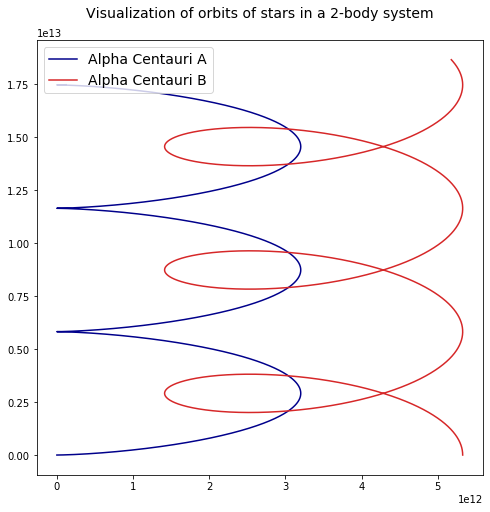

In [12]:
## 3 Body Problem
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci

G = 6.67348 * 10**(-11) #Gravitational costant

m_s = 1.989 * 10 ** 30 #mass of the sun
m1= 1.1 * m_s #mass of Alpha Centuari A
m2= 0.9 * m_s #mass of Alpha Centuari B
T = 0.8 * 10 ** 10 #long enough time frame for at least one full orbit 
dt = 10 ** 4
N = int(T/dt)

t = np.zeros(N)
t[0] = 0 

#constructing arrays for positions and velocities
r1x= np.zeros((N,))
r1y= np.zeros((N,))
v1x= np.zeros((N,))
v1y= np.zeros((N,))

r2x= np.zeros((N,))
r2y= np.zeros((N,))
v2x= np.zeros((N,))
v2y= np.zeros((N,))

#intial positions and velocities
r1x[0]= 0 
r1y[0]= 0
v1x[0] = 0 
v1y[0] = 0

r2x[0]= 5.326 * 10 ** 12
r2y[0]= 0
v2x[0]= 0
v2y[0]= 5004.7

def gforce2(m_1,m_2,r_1_1,r_1_2,r_2_1,r_2_2): #gravitional force between two masses
    f1 = G * m_1 * m_2 * (r_2_1 - r_1_1)/abs(((r_2_1 - r_1_1)**2 + (r_2_2 - r_1_2)**2)**1.5)
    f2 = G * m_1 * m_2 * (r_2_2 - r_1_2)/abs(((r_2_1 - r_1_1)**2 + (r_2_2 - r_1_2)**2)**1.5)
    return f1*dt, f2*dt

for k in range(0,N-1):
    F_fx, F_fy = gforce2(m1,m2,r1x[k],r1y[k],r2x[k],r2y[k])
    
    t[k + 1] = t[k] + dt
    
    v1x[k + 1] = v1x[k] + F_fx/m1
    v1y[k + 1] = v1y[k] + F_fy/m1
    v2x[k + 1] = v2x[k] + -F_fx/m2 
    v2y[k + 1] = v2y[k] + -F_fy/m2
    
    r1x[k + 1] = r1x[k] + v1x[k + 1]*dt
    r1y[k + 1] = r1y[k] + v1y[k + 1]*dt
    r2x[k + 1] = r2x[k] + v2x[k + 1]*dt
    r2y[k + 1] = r2y[k] + v2y[k + 1]*dt
    
#create figure
fig=plt.figure(figsize=(8,8))
#Plot the orbits
plt.plot(r1x,r1y,color="darkblue",label="Alpha Centauri A")
plt.plot(r2x,r2y,color="tab:red",label="Alpha Centauri B")
plt.title("Visualization of orbits of stars in a 2-body system\n",fontsize=14)
plt.legend(loc="upper left",fontsize=14)


The 2-body star system, under the correct initial conditions, results in both the stars orbiting a shared centre of mass. The graphical representation of this shows the 2 masses spiraling around one another with a stable pattern of motion

To form a 3-body star system we added a 3rd star, Alpha Centuari Z with 0.85$M$ mass. 
We gave it position $Rz$ = $\begin{pmatrix} 0 \\ -5.326 \times 10^{12} \end{pmatrix}$ this ensures Alpha Centuari A is positionally at the centre of the star system. We gave Alpha Centuari Z velocity  $Vz$ = $\begin{pmatrix} -5004.7\\ 0 \end{pmatrix}$ this ensures it is moving in the opposite direction to Alpha Centuari B which prevents the 3 stars colliding soon after the start of the simulation.

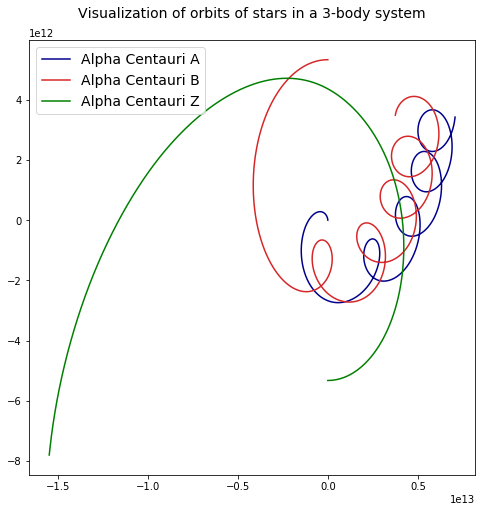

In [13]:

T = 0.8 * 10**10 #long enough to see the system develope an obvious pattern
dt = 10 ** 4

m1 = 1.1 * m_s #Mass of Alpha Centauri A, largest mass in the system
m2 = 0.9 * m_s #Mass of Alpha Centauri B, 2nd largest mass in the system
m3 = 0.85 * m_s #Mass of Alpha Centauri Z, smallest mass in the system
#constructing arrays for positions and velocities of the 3 stars
r1x= np.zeros((N,))
r1y= np.zeros((N,))
v1x= np.zeros((N,))
v1y= np.zeros((N,))
r2x= np.zeros((N,))
r2y= np.zeros((N,))
v2x= np.zeros((N,))
v2y= np.zeros((N,))
r3x= np.zeros((N,))
r3y= np.zeros((N,))
v3x= np.zeros((N,))
v3y= np.zeros((N,))
#initial positions and velocities of the 3 stars
r1x[0]= 0 
r1y[0]= 0
v1x[0] = 0 
v1y[0] = 0
r2x[0]= 0
r2y[0]= 5.326 * 10 ** 12
v2x[0]= -5004.7
v2y[0]= 0
r3x[0]= 0
r3y[0]= -5.326 * 10 ** 12
v3x[0]= 5004.7
v3y[0]= 0

#function for gravitional force between two masses
def gforce2(m_1,m_2,r_1_1,r_1_2,r_2_1,r_2_2): 
    f1 = G * m_1 * m_2 * (r_2_1 - r_1_1)/abs(((r_2_1 - r_1_1)**2 + (r_2_2 - r_1_2)**2)**1.5)
    f2 = G * m_1 * m_2 * (r_2_2 - r_1_2)/abs(((r_2_1 - r_1_1)**2 + (r_2_2 - r_1_2)**2)**1.5)
    return f1*dt, f2*dt


#filling the arrays with values for positions and velocities of the 3 stars
for k in range(0,N-1):
    F_f12x, F_f12y = gforce2(m1,m2,r1x[k],r1y[k],r2x[k],r2y[k])
    F_f13x, F_f13y = gforce2(m1,m3,r1x[k],r1y[k],r3x[k],r3y[k])
    F_f23x, F_f23y = gforce2(m2,m3,r2x[k],r2y[k],r3x[k],r3y[k])
    
    t[k + 1] = t[k] + dt
    
    v1x[k + 1] = v1x[k] + (F_f12x + F_f13x)/m1
    v1y[k + 1] = v1y[k] + (F_f12y + F_f13y)/m1
    v2x[k + 1] = v2x[k] + (-F_f12x + F_f23x)/m2 
    v2y[k + 1] = v2y[k] + (-F_f12y + F_f23y)/m2
    v3x[k + 1] = v3x[k] + (-F_f13x - F_f23x)/m3
    v3y[k + 1] = v3y[k] + (-F_f13y - F_f23y)/m3
    
    r1x[k + 1] = r1x[k] + v1x[k + 1]*dt
    r1y[k + 1] = r1y[k] + v1y[k + 1]*dt
    r2x[k + 1] = r2x[k] + v2x[k + 1]*dt
    r2y[k + 1] = r2y[k] + v2y[k + 1]*dt
    r3x[k + 1] = r3x[k] + v3x[k + 1]*dt
    r3y[k + 1] = r3y[k] + v3y[k + 1]*dt
    
#create figure
fig=plt.figure(figsize=(8,8))
#Plot the orbits
plt.plot(r1x,r1y,color="darkblue",label="Alpha Centauri A")
plt.plot(r2x,r2y,color="tab:red",label="Alpha Centauri B")
plt.plot(r3x,r3y,color="green",label="Alpha Centauri Z")
#Adding labels
plt.title("Visualization of orbits of stars in a 3-body system\n",fontsize=14)
plt.legend(loc="upper left",fontsize=14)






The 3-body system is chaotic by nature, this means any change in the initial conditions results in starkly different orbits of the three stars. We have simulated a few different systems as examples of this.

Example 1:
This is what occurs when we double the mass of Alpha Centuari A.

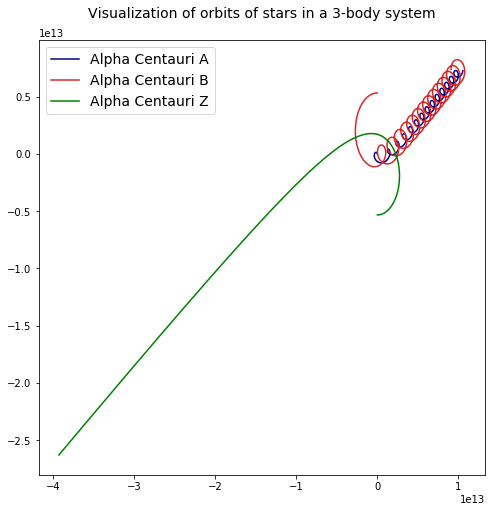

In [14]:
m1 = 2.2 * m_s #Mass of Alpha Centauri A, largest mass in the system
m2 = 0.9 * m_s #Mass of Alpha Centauri B, 2nd largest mass in the system
m3 = 0.85 * m_s #Mass of Alpha Centauri Z, smallest mass in the system

#constructing arrays for positions and velocities of the 3 stars
r1x= np.zeros((N,))
r1y= np.zeros((N,))
v1x= np.zeros((N,))
v1y= np.zeros((N,))

r2x= np.zeros((N,))
r2y= np.zeros((N,))
v2x= np.zeros((N,))
v2y= np.zeros((N,))

r3x= np.zeros((N,))
r3y= np.zeros((N,))
v3x= np.zeros((N,))
v3y= np.zeros((N,))

#initial positions and velocities of the 3 stars
r1x[0]= 0 
r1y[0]= 0
v1x[0] = 0 
v1y[0] = 0
r2x[0]= 0
r2y[0]= 5.326 * 10 ** 12
v2x[0]= -5004.7
v2y[0]= 0
r3x[0]= 0
r3y[0]= -5.326 * 10 ** 12
v3x[0]= 5004.7
v3y[0]= 0
#function for gravitional force between two masses
def gforce2(m_1,m_2,r_1_1,r_1_2,r_2_1,r_2_2): 
    f1 = G * m_1 * m_2 * (r_2_1 - r_1_1)/abs(((r_2_1 - r_1_1)**2 + (r_2_2 - r_1_2)**2)**1.5)
    f2 = G * m_1 * m_2 * (r_2_2 - r_1_2)/abs(((r_2_1 - r_1_1)**2 + (r_2_2 - r_1_2)**2)**1.5)
    return f1*dt, f2*dt
#filling the arrays with values for positions and velocities of the 3 stars
for k in range(0,N-1):
    F_f12x, F_f12y = gforce2(m1,m2,r1x[k],r1y[k],r2x[k],r2y[k])
    F_f13x, F_f13y = gforce2(m1,m3,r1x[k],r1y[k],r3x[k],r3y[k])
    F_f23x, F_f23y = gforce2(m2,m3,r2x[k],r2y[k],r3x[k],r3y[k])
    
    t[k + 1] = t[k] + dt
    
    v1x[k + 1] = v1x[k] + (F_f12x + F_f13x)/m1
    v1y[k + 1] = v1y[k] + (F_f12y + F_f13y)/m1
    v2x[k + 1] = v2x[k] + (-F_f12x + F_f23x)/m2 
    v2y[k + 1] = v2y[k] + (-F_f12y + F_f23y)/m2
    v3x[k + 1] = v3x[k] + (-F_f13x - F_f23x)/m3
    v3y[k + 1] = v3y[k] + (-F_f13y - F_f23y)/m3
    
    r1x[k + 1] = r1x[k] + v1x[k + 1]*dt
    r1y[k + 1] = r1y[k] + v1y[k + 1]*dt
    r2x[k + 1] = r2x[k] + v2x[k + 1]*dt
    r2y[k + 1] = r2y[k] + v2y[k + 1]*dt
    r3x[k + 1] = r3x[k] + v3x[k + 1]*dt
    r3y[k + 1] = r3y[k] + v3y[k + 1]*dt 
#create figure
fig=plt.figure(figsize=(8,8))
#Plot the orbits
plt.plot(r1x,r1y,color="darkblue",label="Alpha Centauri A")
plt.plot(r2x,r2y,color="tab:red",label="Alpha Centauri B")
plt.plot(r3x,r3y,color="green",label="Alpha Centauri Z")
#Adding labels
plt.title("Visualization of orbits of stars in a 3-body system\n",fontsize=14)
plt.legend(loc="upper left",fontsize=14)

As the Alpha Centuari A and Alpha Centuari B stars are much closer to the centre of mass of the entire system in this example we see that they begin to spiral around one another in a much closer orbit similar to what was seen in simulation of the 2-body system. Alpha Centuari Z is moving fast enough to escape the system and moves in the opposite direction to the other two stars.

In [15]:
Example 2: This is what happens when we half the distance between Alpha Centuari A and Alpha Centuari B

SyntaxError: invalid syntax (<ipython-input-15-b0b0bc308e46>, line 1)

In [ ]:
m1 = 1.1 * m_s #Mass of Alpha Centauri A, largest mass in the system
m2 = 0.9 * m_s #Mass of Alpha Centauri B, 2nd largest mass in the system
m3 = 0.85 * m_s #Mass of Alpha Centauri Z, smallest mass in the system

#constructing arrays for positions and velocities of the 3 stars
r1x= np.zeros((N,))
r1y= np.zeros((N,))
v1x= np.zeros((N,))
v1y= np.zeros((N,))
r2x= np.zeros((N,))
r2y= np.zeros((N,))
v2x= np.zeros((N,))
v2y= np.zeros((N,))
r3x= np.zeros((N,))
r3y= np.zeros((N,))
v3x= np.zeros((N,))
v3y= np.zeros((N,))
#initial positions and velocities of the 3 stars
r1x[0]= 0 
r1y[0]= 0
v1x[0] = 0 
v1y[0] = 0
r2x[0]= 0
r2y[0]= (5.326/2) * 10 ** 12
v2x[0]= -5004.7
v2y[0]= 0
r3x[0]= 0
r3y[0]= -5.326 * 10 ** 12
v3x[0]= 5004.7
v3y[0]= 0
#function for gravitional force between two masses
def gforce2(m_1,m_2,r_1_1,r_1_2,r_2_1,r_2_2): 
    f1 = G * m_1 * m_2 * (r_2_1 - r_1_1)/abs(((r_2_1 - r_1_1)**2 + (r_2_2 - r_1_2)**2)**1.5)
    f2 = G * m_1 * m_2 * (r_2_2 - r_1_2)/abs(((r_2_1 - r_1_1)**2 + (r_2_2 - r_1_2)**2)**1.5)
    return f1*dt, f2*dt
#filling the arrays with values for positions and velocities of the 3 stars
for k in range(0,N-1):
    F_f12x, F_f12y = gforce2(m1,m2,r1x[k],r1y[k],r2x[k],r2y[k])
    F_f13x, F_f13y = gforce2(m1,m3,r1x[k],r1y[k],r3x[k],r3y[k])
    F_f23x, F_f23y = gforce2(m2,m3,r2x[k],r2y[k],r3x[k],r3y[k])
    t[k + 1] = t[k] + dt
    v1x[k + 1] = v1x[k] + (F_f12x + F_f13x)/m1
    v1y[k + 1] = v1y[k] + (F_f12y + F_f13y)/m1
    v2x[k + 1] = v2x[k] + (-F_f12x + F_f23x)/m2 
    v2y[k + 1] = v2y[k] + (-F_f12y + F_f23y)/m2
    v3x[k + 1] = v3x[k] + (-F_f13x - F_f23x)/m3
    v3y[k + 1] = v3y[k] + (-F_f13y - F_f23y)/m3
    r1x[k + 1] = r1x[k] + v1x[k + 1]*dt
    r1y[k + 1] = r1y[k] + v1y[k + 1]*dt
    r2x[k + 1] = r2x[k] + v2x[k + 1]*dt
    r2y[k + 1] = r2y[k] + v2y[k + 1]*dt
    r3x[k + 1] = r3x[k] + v3x[k + 1]*dt
    r3y[k + 1] = r3y[k] + v3y[k + 1]*dt
#create figure
fig=plt.figure(figsize=(8,8))
#Plot the orbits
plt.plot(r1x,r1y,color="darkblue",label="Alpha Centauri A")
plt.plot(r2x,r2y,color="tab:red",label="Alpha Centauri B")
plt.plot(r3x,r3y,color="green",label="Alpha Centauri Z")
#Adding labels
plt.title("Visualization of orbits of stars in a 3-body system\n",fontsize=14)
plt.legend(loc="upper left",fontsize=14)

As the distance between Alpha Centuari B and the other 2 stars is much smaller in this example, the velocity of Alpha Centuari Z is below the escape velocity of the system and the 3 stars remain in orbit of eachother.

In [ ]:
Example 3: This is what happens when we half the initial velocity of Alpha Centuari Z.

In [ ]:
T = 0.8 * 10**10 #long enough to see the system develope an obvious pattern
dt = 10 ** 4

m1 = 1.1 * m_s #Mass of Alpha Centauri A, largest mass in the system
m2 = 0.9 * m_s #Mass of Alpha Centauri B, 2nd largest mass in the system
m3 = 0.85 * m_s #Mass of Alpha Centauri Z, smallest mass in the system
#constructing arrays for positions and velocities of the 3 stars
r1x= np.zeros((N,))
r1y= np.zeros((N,))
v1x= np.zeros((N,))
v1y= np.zeros((N,))
r2x= np.zeros((N,))
r2y= np.zeros((N,))
v2x= np.zeros((N,))
v2y= np.zeros((N,))
r3x= np.zeros((N,))
r3y= np.zeros((N,))
v3x= np.zeros((N,))
v3y= np.zeros((N,))
#initial positions and velocities of the 3 stars
r1x[0]= 0 
r1y[0]= 0
v1x[0] = 0 
v1y[0] = 0
r2x[0]= 0
r2y[0]= 5.326 * 10 ** 12
v2x[0]= -5004.7
v2y[0]= 0
r3x[0]= 0
r3y[0]= -5.326 * 10 ** 12
v3x[0]= 5004.7/2
v3y[0]= 0

#function for gravitional force between two masses
def gforce2(m_1,m_2,r_1_1,r_1_2,r_2_1,r_2_2): 
    f1 = G * m_1 * m_2 * (r_2_1 - r_1_1)/abs(((r_2_1 - r_1_1)**2 + (r_2_2 - r_1_2)**2)**1.5)
    f2 = G * m_1 * m_2 * (r_2_2 - r_1_2)/abs(((r_2_1 - r_1_1)**2 + (r_2_2 - r_1_2)**2)**1.5)
    return f1*dt, f2*dt


#filling the arrays with values for positions and velocities of the 3 stars
for k in range(0,N-1):
    F_f12x, F_f12y = gforce2(m1,m2,r1x[k],r1y[k],r2x[k],r2y[k])
    F_f13x, F_f13y = gforce2(m1,m3,r1x[k],r1y[k],r3x[k],r3y[k])
    F_f23x, F_f23y = gforce2(m2,m3,r2x[k],r2y[k],r3x[k],r3y[k])
    
    t[k + 1] = t[k] + dt
    
    v1x[k + 1] = v1x[k] + (F_f12x + F_f13x)/m1
    v1y[k + 1] = v1y[k] + (F_f12y + F_f13y)/m1
    v2x[k + 1] = v2x[k] + (-F_f12x + F_f23x)/m2 
    v2y[k + 1] = v2y[k] + (-F_f12y + F_f23y)/m2
    v3x[k + 1] = v3x[k] + (-F_f13x - F_f23x)/m3
    v3y[k + 1] = v3y[k] + (-F_f13y - F_f23y)/m3
    
    r1x[k + 1] = r1x[k] + v1x[k + 1]*dt
    r1y[k + 1] = r1y[k] + v1y[k + 1]*dt
    r2x[k + 1] = r2x[k] + v2x[k + 1]*dt
    r2y[k + 1] = r2y[k] + v2y[k + 1]*dt
    r3x[k + 1] = r3x[k] + v3x[k + 1]*dt
    r3y[k + 1] = r3y[k] + v3y[k + 1]*dt
    
#create figure
fig=plt.figure(figsize=(8,8))
#Plot the orbits
plt.plot(r1x,r1y,color="darkblue",label="Alpha Centauri A")
plt.plot(r2x,r2y,color="tab:red",label="Alpha Centauri B")
plt.plot(r3x,r3y,color="green",label="Alpha Centauri Z")
#Adding labels
plt.title("Visualization of orbits of stars in a 3-body system\n",fontsize=14)
plt.legend(loc="upper left",fontsize=14)


NB: 'Planet Name' is not used as the index for the benefit of having an integer-valued index in the following code.

In [ ]:
import numpy as np

ms = list(df.iloc[:,0])
r0s = list(df.iloc[:,1])
v0s = list(df.iloc[:,2])
Ts = list(df.iloc[:,3])
names = list(df.iloc[:,4])

G = 6.67348 * 10**(-11)
T =  10**9
N = 10**4
dt = T/N
t = np.zeros((N,))
r_1 = np.zeros((N,9))
r_1[0,:] = r0s
r_2 = np.zeros((N,9))
v_1 = np.zeros((N,9))
v_2 = np.zeros((N,9))
v_2[0,:] = v0s

def gforcesun(m,r_1,r_2): 
        f1 = G * m * m_s * (-r_1)/abs((r_1**2 + r_2**2)**1.5)
        f2 = G * m * m_s * (-r_2)/abs((r_1**2 + r_2**2)**1.5)
        return f1*dt, f2*dt

def gforce_all(planet,r_1,r_2):
    z = names.index(planet)
    x = r_1[z]
    y = r_2[z]
    r_2_1 = list(r_1)
    r_2_2 = list(r_2)
    del r_2_1[z]
    del r_2_2[z]
    m_p = ms[z]
    ms_o = list(ms)
    del ms_o[z]
    f1_parts = []
    f2_parts = []
    for i in range(len(r_2_1)):
        g1 = m_p * ms_o[i] * (r_2_1[i] - x)/abs(((r_2_1[i] - x)**2 + (r_2_2[i] - y)**2)**1.5)
        g2 = m_p * ms_o[i] * (r_2_2[i] - y)/abs(((r_2_1[i] - x)**2 + (r_2_2[i] - y)**2)**1.5)
        f1_parts.append(g1)
        f2_parts.append(g2)
    f1 = G * sum(f1_parts)
    f2 = G * sum(f2_parts)
    return f1*dt, f2*dt

for k in range(0,N-1):
    F_f1 = np.zeros((9))
    F_f2 = np.zeros((9))
    for l in range(len(names)):
        F_f1[l], F_f2[l] = gforce_all(names[l],r_1[k,:],r_2[k,:])
    for j in range(9):
        t[k + 1] = t[k] + dt
        v_1[k + 1,j] = v_1[k,j] + F_f1[j]/ms[j]
        v_2[k + 1,j] = v_2[k,j] + F_f2[j]/ms[j]
        r_1[k + 1,j] = r_1[k,j] + v_1[k + 1,j]*dt
        r_2[k + 1,j] = r_2[k,j] + v_2[k + 1,j]*dt
plt.figure(figsize=(12,12))
plt.gca().set_aspect('equal', adjustable='box')
plt.plot(r_1[:,0],r_2[:,0],'gold', label='The Sun')
plt.plot(r_1[:,1],r_2[:,1],'lightsteelblue', label='Mercury')
plt.plot(r_1[:,2],r_2[:,2],'darkorange', label='Venus')
plt.plot(r_1[:,3],r_2[:,3],'g', label='Earth')
plt.plot(r_1[:,4],r_2[:,4],'r', label='Mars')
plt.plot(r_1[:,5],r_2[:,5],'b', label='Jupiter')
plt.plot(r_1[:,6],r_2[:,6],'mediumpurple', label='Saturn')
plt.plot(r_1[:,7],r_2[:,7],'m', label='Uranus')
plt.plot(r_1[:,8],r_2[:,8],'aqua', label='Neptune')
plt.legend()
plt.show()

This code works in the same vein to the one we described earlier plotting just Earth's orbit but with a few key differences: 
 - Instead of using individual values as the input (like those in the above dataframe), we use lists of values (i.e. each column of the dataframe), and then instead of two, size N arrays containing the position vector values, we now use N x 9 matrices to carry the information for all 9 bodies simultaneously.
 - We only use 10,000 iterations as we have made our problem effectively 9 times larger, it takes much longer to run if we were to use 100,000 iterations as before.
 - We have a more complex function to calculate the gravitional force on each body of mass. This new one accounts, not only for the (most significant) attraction of the sun, but also for the other seven planets moving around it. We also don't make any assumption about the sun remaining (relatively) stationary. However, simply looking at the above simulation neither of these factors seem to massively deviate the orbits for any of the eight planets.
 

One final, glaring, point to note is that we have not plotted complete orbits for the two outer planets. This is simply due the computing power of the devices we have available as we need a sufficiently small time-step to produce accurate plots for the inner planets. Sadly, we such a small time-step we can only produce incomplete plots for the outer two planets but we believe this compromise accurately give an indication of the behaviour of planets with respect to The Sun in our solar system.